In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')

In [3]:
with open('/home/brad/tmpdata/JSpopA.pkl', 'rb') as f:
    datA = pickle.load(f)
with open('/home/brad/tmpdata/JSpopB.pkl', 'rb') as f:
    datB = pickle.load(f)
with open('/home/brad/tmpdata/JSpopA_shuffled.pkl', 'rb') as f:
    datAshuffled = pickle.load(f)
with open('/home/brad/tmpdata/JSpopB_shuffled.pkl', 'rb') as f:
    datBshuffled = pickle.load(f)
with open('/home/brad/tmpdata/JSpopB1075.pkl', 'rb') as f:
    datB1075 = pickle.load(f)
    

dats = [datA, datB, datAshuffled, datBshuffled, datB1075]
ntrials = 20
nstim = 16
iu = np.triu_indices(320,1)
il = np.tril_indices(320,-1)
def lognormal(x, u, s):
    a = np.exp(-(np.log(x) - u)**2 / (2*s**2))
    b = x*s*np.sqrt(2*np.pi)
    return np.divide(a,b)

/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


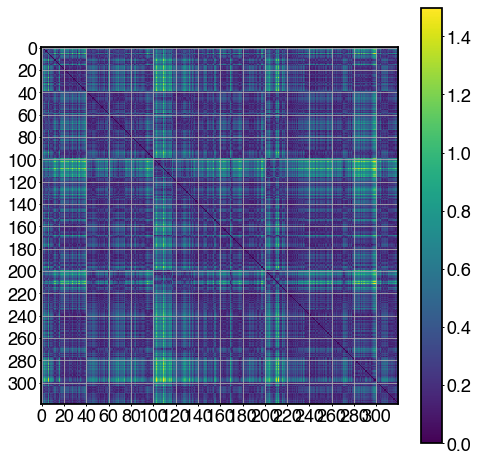

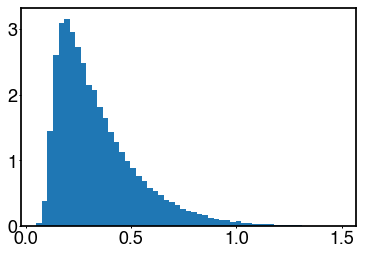

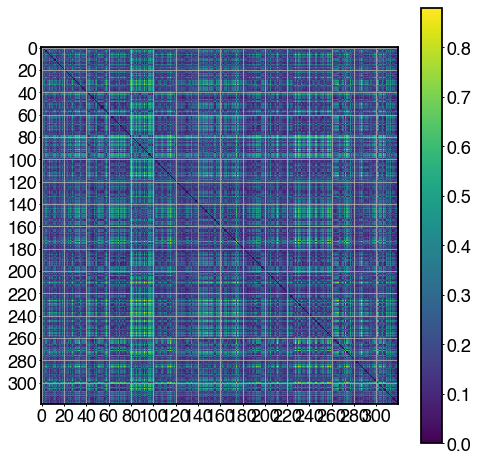

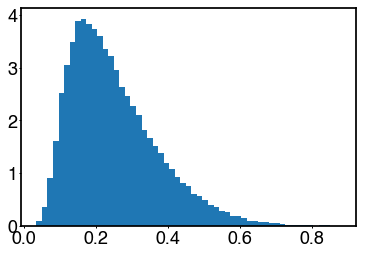

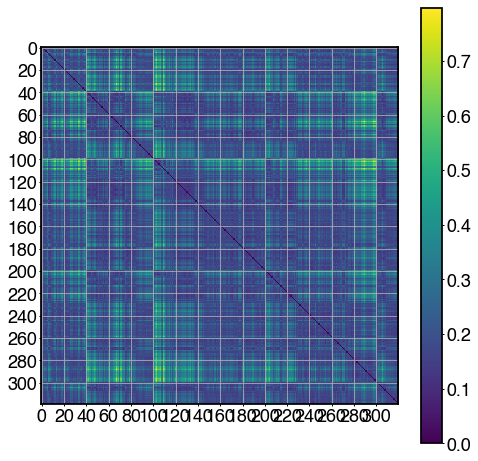

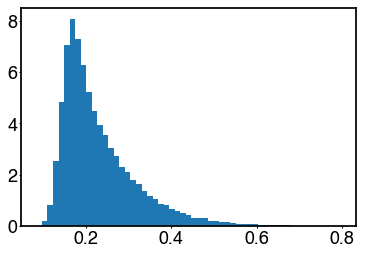

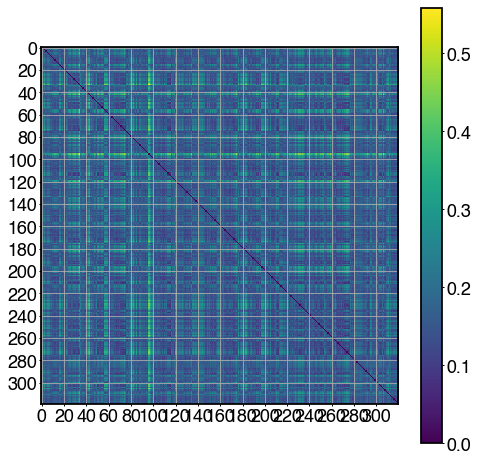

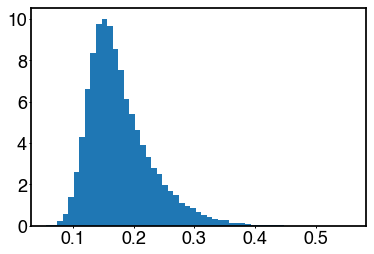

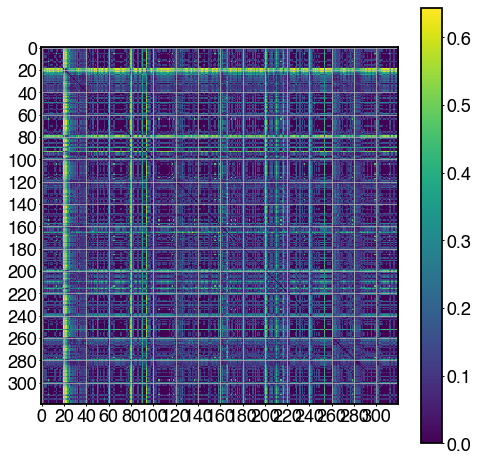

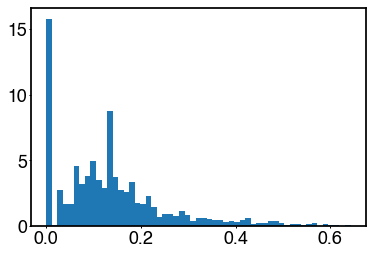

In [5]:

for dat in dats:
    dat = dat + dat.T
    plt.figure(figsize=(8,8))
    plt.imshow(dat)
    plt.xticks(np.arange(0,320, 20))
    plt.yticks(np.arange(0,320, 20))
    plt.grid(True)
    plt.colorbar()
    unique_js = dat[iu]
    plt.figure()
    plt.hist(unique_js, bins=55, density=True, stacked=True)
    mn = np.mean(np.log(unique_js))
    std = np.std(np.log(unique_js))

#     x = np.linspace(0.01, 1, 100)
#     plt.plot(x, lognormal(x, mn, std))
#     plt.figure()
#     plt.hist(np.log(unique_js), bins=55, density=True, stacked=True)

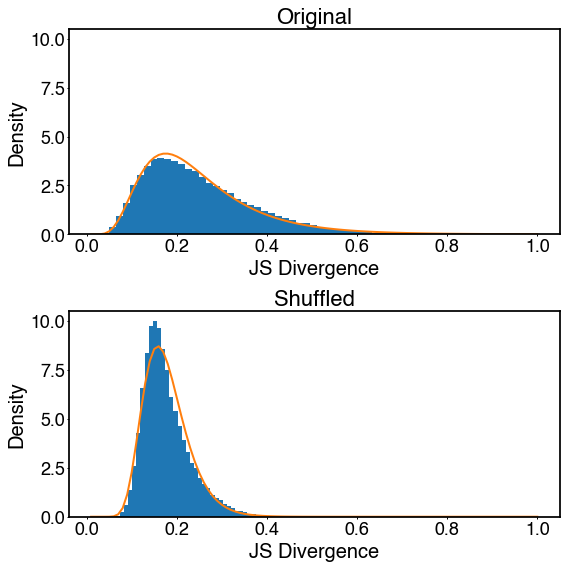

In [106]:
plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')
f=plt.figure(figsize=(8, 8))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex=ax1, sharey=ax1)
axs=[ax1, ax2]
titles = ['Original', 'Shuffled']
for ind,dat in enumerate([datB, datBshuffled]):
    ax = axs[ind]
    unique_js = dat[iu]
    ax.hist(unique_js, bins=55, density=True)
    mn = np.mean(np.log(unique_js))
    std = np.std(np.log(unique_js))

    x = np.linspace(0.01, 1, 100)
    ax.plot(x, lognormal(x, mn, std))
    ax.set_title(titles[ind])
    ax.set_xlabel('JS Divergence')
    ax.set_ylabel('Density')
plt.tight_layout()


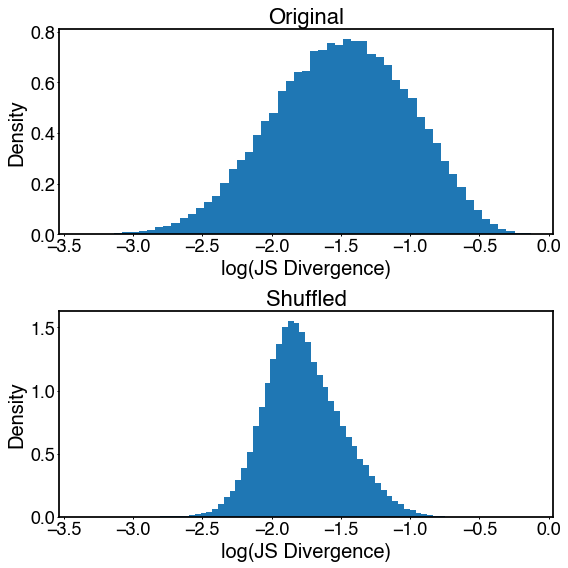

In [107]:
from scipy.stats import norm
plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')
f=plt.figure(figsize=(8, 8))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex=ax1)
axs=[ax1, ax2]
titles = ['Original', 'Shuffled']
for ind,dat in enumerate([datB, datBshuffled]):
    ax = axs[ind]
    unique_js = dat[iu]
    ax.hist(np.log(unique_js), bins=55, density=True)
    mn = np.mean(np.log(unique_js))
    std = np.std(np.log(unique_js))


    ax.set_title(titles[ind])
    ax.set_xlabel('log(JS Divergence)')
    ax.set_ylabel('Density')
plt.tight_layout()


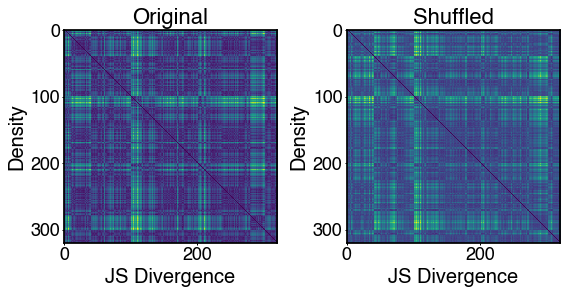

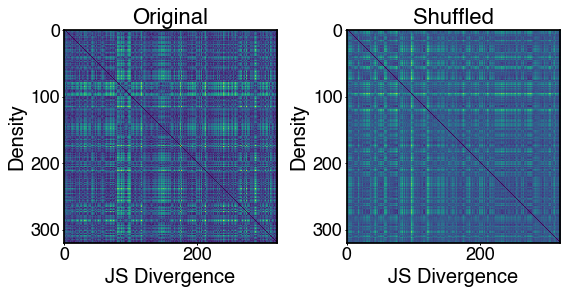

In [116]:
plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')
f=plt.figure(figsize=(8, 8))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
axs=[ax1, ax2]
titles = ['Original', 'Shuffled']
for ind,dat in enumerate([datA, datAshuffled]):
    ax = axs[ind]
    ax.imshow(dat+dat.T)
    ax.set_title(titles[ind])
    ax.set_xlabel('JS Divergence')
    ax.set_ylabel('Density')
plt.tight_layout()
plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')
f=plt.figure(figsize=(8, 8))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
axs=[ax1, ax2]
titles = ['Original', 'Shuffled']
for ind,dat in enumerate([datB, datBshuffled]):
    ax = axs[ind]
    ax.imshow(dat+dat.T)
    ax.set_title(titles[ind])
    ax.set_xlabel('JS Divergence')
    ax.set_ylabel('Density')
plt.tight_layout()

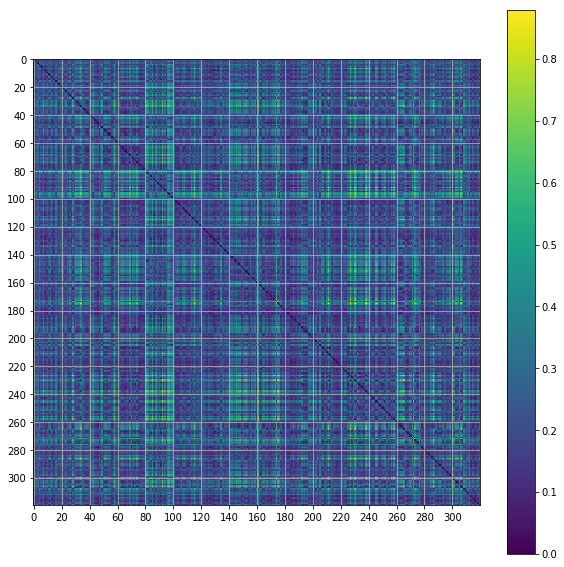

In [56]:
plt.figure(figsize=(10,10))
plt.imshow(dat)
plt.xticks(np.arange(0,320, 20))
plt.yticks(np.arange(0,320, 20))
plt.grid(True)
plt.colorbar()

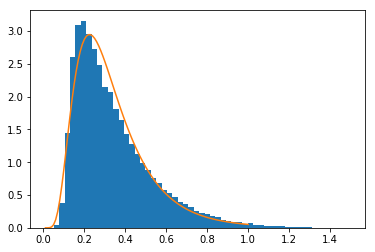

In [60]:
unique_js = dat[iu]
plt.hist(unique_js, bins=55, density=True, stacked=True)
mn = np.mean(np.log(unique_js))
std = np.std(np.log(unique_js))

x = np.linspace(0.01, 1, 100)
plt.plot(x, lognormal(x, mn, std))

In [53]:
from scipy.special import gamma
def lognormal(x, u, s):
    a = np.exp(-(np.log(x) - u)**2 / (2*s**2))
    b = x*s*np.sqrt(2*np.pi)
    return np.divide(a,b)
    

In [118]:
datAlin = datA[iu]
datBlin = datB[iu]
datAn = datAlin / np.sum(datAlin)
datBn = datBlin / np.sum(datBlin)

relentropyAB = -np.sum(np.multiply(datAn, np.log2(np.divide(datBn, datAn))))
print(relentropyAB)
relentropyBA = -np.sum(np.multiply(datBn, np.log2(np.divide(datAn, datBn))))
print(relentropyBA)

print(' ')
datAlins = datAshuffled[iu]
datBlins = datBshuffled[iu]
datAns = datAlins / np.sum(datAlins)
datBns = datBlins / np.sum(datBlins)

relentropyABs = -np.sum(np.multiply(datAns, np.log2(np.divide(datBns, datAns))))
print(relentropyABs)
relentropyBAs = -np.sum(np.multiply(datBns, np.log2(np.divide(datAns, datBns))))
print(relentropyBAs)

print(' ')
print(relentropyAB)
relentropyAAs = -np.sum(np.multiply(datAn, np.log2(np.divide(datAns, datAn))))
print(relentropyAAs)

print(' ')
print(relentropyBA)
relentropyBBs = -np.sum(np.multiply(datBn, np.log2(np.divide(datBns, datBn))))
print(relentropyBBs)

0.37949524897382364
0.370475006947117
 
0.151646716527338
0.14687059882813802
 
0.37949524897382364
0.13034308838563358
 
0.370475006947117
0.13570137656645043


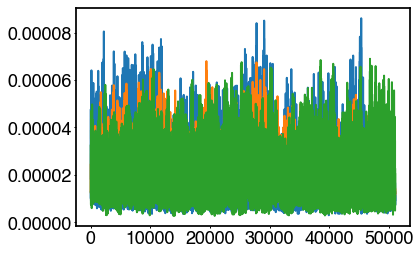

In [126]:

plt.plot(datAn)
plt.plot(datAns)
plt.plot(datBn)
#plt.plot(datBns)

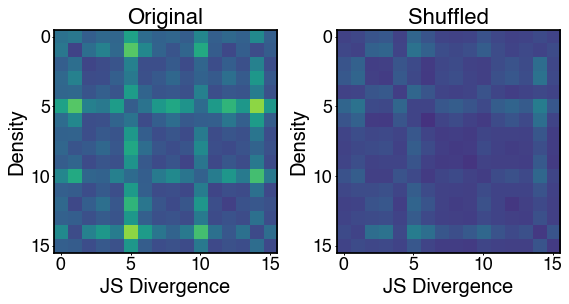

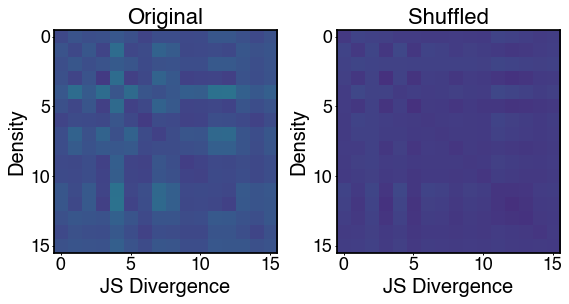

In [136]:
stim_matA = np.zeros((16, 16))


def avg_trials(mat, nstim, ntrial):
    retmat = np.zeros((nstim, nstim))
    for s1 in range(nstim):
        for s2 in range(nstim):
            m = np.mean(mat[s1*ntrials:(s1*ntrials+ntrials), s2*ntrials:(s2*ntrials+ntrials)])
            retmat[s1, s2] = m
    return retmat

plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')
f=plt.figure(figsize=(8, 8))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
axs=[ax1, ax2]
titles = ['Original', 'Shuffled']
for ind,dat in enumerate([datA, datAshuffled]):
    ax = axs[ind]
    ax.imshow(avg_trials(dat + dat.T, nstim, ntrials), vmin=0.0, vmax=1.0)
    ax.set_title(titles[ind])
    ax.set_xlabel('JS Divergence')
    ax.set_ylabel('Density')
plt.tight_layout()
f=plt.figure(figsize=(8, 8))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
axs=[ax1, ax2]
titles = ['Original', 'Shuffled']
for ind,dat in enumerate([datB, datBshuffled]):
    ax = axs[ind]
    ax.imshow(avg_trials(dat + dat.T, nstim, ntrials), vmin=0.0, vmax=1.0)
    ax.set_title(titles[ind])
    ax.set_xlabel('JS Divergence')
    ax.set_ylabel('Density')
plt.tight_layout()

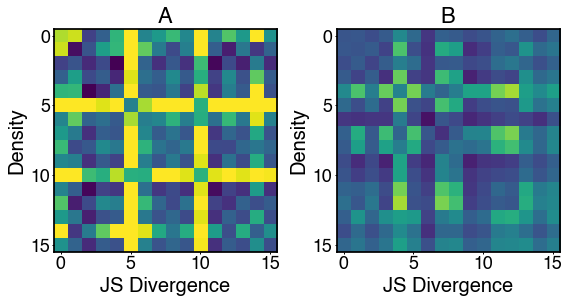

In [140]:
plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')
f=plt.figure(figsize=(8, 8))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
axs=[ax1, ax2]
titles = ['A', 'B']
for ind,dat in enumerate([(datA, datAshuffled), (datB, datBshuffled)]):
    ax = axs[ind]
    datr = dat[0]
    dats = dat[1]
    datra = avg_trials(datr+datr.T, nstim, ntrials)
    datsa = avg_trials(dats+dats.T, nstim, ntrials)
    ax.imshow(datra-datsa, vmin=0.0, vmax=0.2)
    ax.set_title(titles[ind])
    ax.set_xlabel('JS Divergence')
    ax.set_ylabel('Density')
plt.tight_layout()

Within stimulus Mean: 0.25441901666584404
Between stimulus Mean: 0.346053794312797
Within stimulus Mean - Shuffled: 0.1883847023684243
Between stimulus Mean - Shuffled: 0.2321695881629835


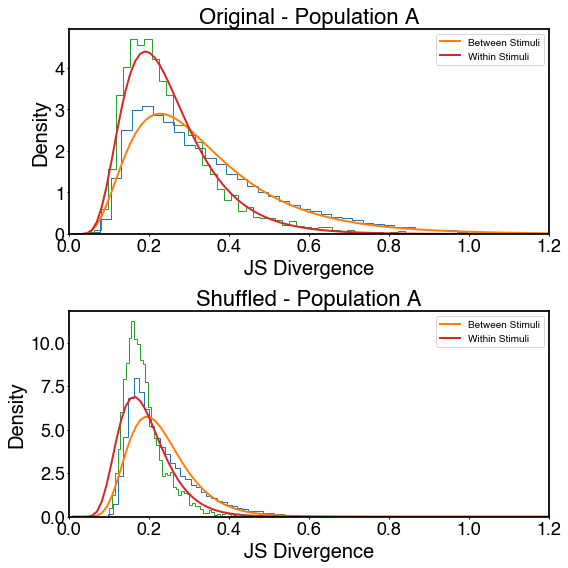

In [23]:
trialeye = np.ones((ntrials, ntrials))
within_stim_mask = np.kron(np.eye(nstim), trialeye)
between_stim_mask = np.abs(1-within_stim_mask)
within_stim_js = np.multiply(datA+datA.T, within_stim_mask) 
between_stim_js = np.multiply(datA+datA.T, between_stim_mask) 
within_stim_js_shuff = np.multiply(datAshuffled+datAshuffled.T, within_stim_mask) 
between_stim_js_shuff = np.multiply(datAshuffled+datAshuffled.T, between_stim_mask) 

between_stim = between_stim_js[iu]
between_stim = between_stim[between_stim >0]
within_stim = within_stim_js[iu]
within_stim = within_stim[within_stim >0]
between_stim_shuff = between_stim_js_shuff[iu]
between_stim_shuff = between_stim_shuff[between_stim_shuff >0]
within_stim_shuff = within_stim_js_shuff[iu]
within_stim_shuff = within_stim_shuff[within_stim_shuff >0]

mn_within = np.mean(np.log(within_stim))
std_within = np.std(np.log(within_stim))
print('Within stimulus Mean: {}'.format(np.mean(within_stim)))
mn_between = np.mean(np.log(between_stim))
std_between = np.std(np.log(between_stim))
print('Between stimulus Mean: {}'.format(np.mean(between_stim)))

mn_within_shuff = np.mean(np.log(within_stim_shuff))
std_within_shuff = np.std(np.log(within_stim_shuff))
print('Within stimulus Mean - Shuffled: {}'.format(np.mean(within_stim_shuff)))

mn_between_shuff = np.mean(np.log(between_stim_shuff))
std_between_shuff = np.std(np.log(between_stim_shuff))
print('Between stimulus Mean - Shuffled: {}'.format(np.mean(between_stim_shuff)))
x = np.linspace(0.01, 1.2, 100)



f = plt.figure(figsize=(8,8))
ax1 = f.add_subplot(211) 
ax2 = f.add_subplot(212, sharex=ax1)
ax1.hist(between_stim, bins=55, density=True, histtype='step')
ax1.plot(x, lognormal(x, mn_between, std_between))
ax1.hist(within_stim, bins=55, density=True, histtype='step')
ax1.plot(x, lognormal(x, mn_within, std_within))
ax1.legend(['Between Stimuli', 'Within Stimuli'])
ax1.set_title('Original - Population A')
ax1.set_xlim([0, 1.2])
ax1.set_xlabel('JS Divergence')
ax1.set_ylabel('Density')

ax2.hist(between_stim_shuff, bins=55, density=True, histtype='step')
ax2.plot(x, lognormal(x, mn_between_shuff, std_between_shuff))
ax2.hist(within_stim_shuff, bins=55, density=True, histtype='step')
ax2.plot(x, lognormal(x, mn_within_shuff, std_between_shuff))
ax2.legend(['Between Stimuli', 'Within Stimuli'])
ax2.set_title('Shuffled - Population A')
ax2.set_xlabel('JS Divergence')
ax2.set_ylabel('Density')
plt.tight_layout()

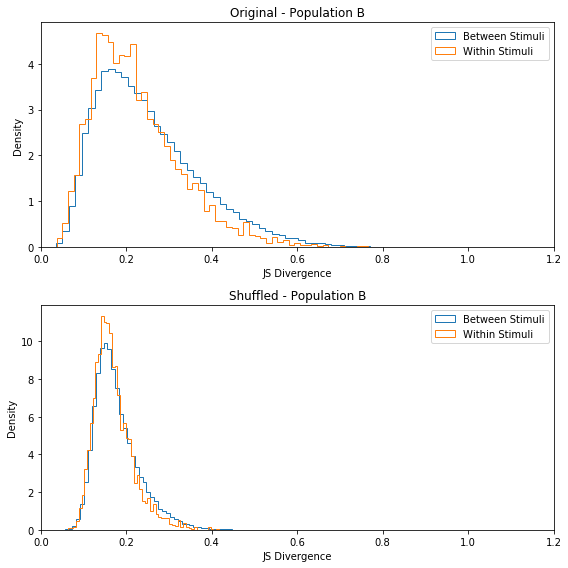

In [9]:
#within stim vs between stim
#extract all the within-stim JS divergences by making a mask
trialeye = np.ones((ntrials, ntrials))
within_stim_mask = np.kron(np.eye(nstim), trialeye)
between_stim_mask = np.abs(1-within_stim_mask)
within_stim_js = np.multiply(datB+datB.T, within_stim_mask)
between_stim_js = np.multiply(datB+datB.T, between_stim_mask)
within_stim_js_shuff = np.multiply(datBshuffled+datBshuffled.T, within_stim_mask)
between_stim_js_shuff = np.multiply(datBshuffled+datBshuffled.T, between_stim_mask)

between_stim = between_stim_js[iu]
between_stim = between_stim[between_stim >0]
within_stim = within_stim_js[iu]
within_stim = within_stim[within_stim >0]
between_stim_shuff = between_stim_js_shuff[iu]
between_stim_shuff = between_stim_shuff[between_stim_shuff >0]
within_stim_shuff = within_stim_js_shuff[iu]
within_stim_shuff = within_stim_shuff[within_stim_shuff >0]
f = plt.figure(figsize=(8,8))
ax1 = f.add_subplot(211) 
ax2 = f.add_subplot(212, sharex=ax1)
ax1.hist(between_stim, bins=55, density=True, histtype='step')
ax1.hist(within_stim, bins=55, density=True, histtype='step')
ax1.legend(['Between Stimuli', 'Within Stimuli'])
ax1.set_title('Original - Population B')
ax1.set_xlim([0, 1.2])
ax1.set_xlabel('JS Divergence')
ax1.set_ylabel('Density')

ax2.hist(between_stim_shuff, bins=55, density=True, histtype='step')
ax2.hist(within_stim_shuff, bins=55, density=True, histtype='step')
ax2.legend(['Between Stimuli', 'Within Stimuli'])
ax2.set_title('Shuffled - Population B')
ax2.set_xlabel('JS Divergence')
ax2.set_ylabel('Density')
plt.tight_layout()